Domain- First Hand / Second Hand Cars 


website=Cars24.com

Problem Statement-Mr A is in need of Car. He has budget constraint so he is going for Second Hand/ Used car. He decided to buy Car from Car's24.com because it has variety of Car's that too in  different price segments.He wanted to buy Car which cost not more than 5lac. it must be a Petrol Car which hasn't been driven more than 10000Km.
To find out the car's which falls under the Mr A's requirement we need to extract data from websites and also run EDA so that we can get desired result

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

In [2]:
url='https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3687&pinId=500003'

In [3]:
page=requests.get(url)

In [4]:
page.status_code

200

In [5]:
page.content

b'<!DOCTYPE html>\n\n<html lang="en">\n\n<head>\n    <link rel="preconnect" href="//www.googleoptimize.com" />\n    <link rel="preconnect" href="//www.googletagmanager.com" />\n    <link rel="preconnect" href="//www.google-analytics.com" />\n    <link rel="preconnect" href="//connect.facebook.net" />\n    <link rel="preconnect" href="//cdn.jsdelivr.net" />\n    <link rel="preconnect" href="//widgets.getsitecontrol.com" />\n    <link rel="preconnect" href="//s.yimg.com" />\n    <link rel="preconnect" href="//www.googleadservices.com" />\n    <link rel="preconnect" href="//d2r1yp2w7bby2u.cloudfront.net" /><meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n    <meta property="fb:app_id" content="697234207046254" /><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link data-react-helmet="true" rel="preload" href="https://fastly-producti

In [6]:
#geting the HTML content from web page
pagecontent=page.text

In [7]:
soup=BeautifulSoup(pagecontent)

In [8]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<link href="//www.googleoptimize.com" rel="preconnect"/>
<link href="//www.googletagmanager.com" rel="preconnect"/>
<link href="//www.google-analytics.com" rel="preconnect"/>
<link href="//connect.facebook.net" rel="preconnect"/>
<link href="//cdn.jsdelivr.net" rel="preconnect"/>
<link href="//widgets.getsitecontrol.com" rel="preconnect"/>
<link href="//s.yimg.com" rel="preconnect"/>
<link href="//www.googleadservices.com" rel="preconnect"/>
<link href="//d2r1yp2w7bby2u.cloudfront.net" rel="preconnect"/><meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="697234207046254" property="fb:app_id"/><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/><link as="image" data-react-helmet="true" href="https://fastly-production.24c.in/hello-ar/dev/uploads/19647fc1-c9f1-4c18-beda-220a18561eea/ae2a3c04

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="//www.googleoptimize.com" rel="preconnect"/>
  <link href="//www.googletagmanager.com" rel="preconnect"/>
  <link href="//www.google-analytics.com" rel="preconnect"/>
  <link href="//connect.facebook.net" rel="preconnect"/>
  <link href="//cdn.jsdelivr.net" rel="preconnect"/>
  <link href="//widgets.getsitecontrol.com" rel="preconnect"/>
  <link href="//s.yimg.com" rel="preconnect"/>
  <link href="//www.googleadservices.com" rel="preconnect"/>
  <link href="//d2r1yp2w7bby2u.cloudfront.net" rel="preconnect"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="697234207046254" property="fb:app_id"/>
  <!--scripts from helmet-->
  <link data-react-helmet="true" href="https://www.cars24.com/buy-used-car/" rel="canonical"/>
  <link as="image" data-react-helmet="true" href="https://fastly-production.24c.in/hello-ar/dev/uploads/19647fc1-c

In [16]:
city=[2,134,5,2378,2423,4709,3686,5732,777,1692,136,2137,135,684,1771,2660,359,1822,2987,7313,6289,769,6105,1512,8517,
     6,132,280,6772,2498,4995,2920,3119,2130,692,1620,8440,2310,173,6356,2563,2234,6388,290,666,5951,4862,404,650,4747,2713,
     2598,38,8184,3460,1604,8518,29,33,6054,62,1605,6336,5862,6565,2185,1674,1604,191,3712,4408,648]
Car_Name=[]
Km=[]
Price=[]
year=[]
owner=[]
emi=[]
pagenum=[]

for i in city:
    url="https://www.cars24.com/buy-used-car/?sort=P&storeCityId="+str(i)
    print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    start_time=time.time()
    
    for x in soup.find_all('div',attrs={'class':'col-4'}):
            name=x.find('h2',class_='_3FpCg')
            km=x.find('ul',class_='bVR0c')
            p=x.find('div',class_='_7udZZ')
            caremi=x.find('div',class_='_2HFRN')
            own=x.find('ul',class_='bVR0c')
    
    
    
            if name is None:
                Car_Name.append(np.NaN)
            else:
                Car_Name.append(name.text)
            if km is None:
                Km.append(np.NaN)
            else:
                Km.append(km.text)
            if p is None:
                Price.append(np.NaN)
            else:
                Price.append(p.text)
            if own is None:
                owner.append(np.NaN)
            else:
                owner.append(own.text)
            if caremi is None:
                emi.append(np.NaN)
            else:
                emi.append(caremi.text)

            pagenum.append(i)
            
print("page {} completed in {} seconds".format(i,time.time()-start_time))
    

https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=134
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=5
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2378
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2423
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=4709
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=3686
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=5732
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=777
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=1692
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=136
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2137
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=135
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=684
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=1771
https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2660
https://www.cars24.com/buy-used-car

In [17]:
print(len(Car_Name))


597


In [18]:
#Creating DataFrame
df=pd.DataFrame({'CarName':Car_Name,'Price':Price,'KM':Km,'Owner':owner,'Emi':emi})

In [19]:
df.head()

CarName      Price                        KM  \
0  2021 Maruti Swift  ₹5,66,399  13,174 km1st OwnerPetrol   
1  2019 Maruti Swift  ₹5,58,699  13,780 km1st OwnerPetrol   
2  2020 Maruti Dzire  ₹6,23,599  11,641 km2nd OwnerPetrol   
3   2011 Maruti Ritz  ₹1,92,299  85,095 km1st OwnerPetrol   
4  2019 Renault Kwid  ₹4,04,099   5,660 km1st OwnerPetrol   

                      Owner            Emi  
0  13,174 km1st OwnerPetrol  ₹11,073/month  
1  13,780 km1st OwnerPetrol  ₹10,923/month  
2  11,641 km2nd OwnerPetrol  ₹12,191/month  
3  85,095 km1st OwnerPetrol   ₹3,759/month  
4   5,660 km1st OwnerPetrol   ₹7,900/month

In [20]:
#checking shape of DataFrame
df.shape

(597, 5)

In [21]:
#checking null values
df.isnull().sum()

CarName    30
Price      30
KM         30
Owner      30
Emi        30
dtype: int64

In [22]:
#droping null values because those are the empty spaces in our scrapped site which is of no use.
df=df.dropna()

In [23]:
#again checking null values
df.isnull().sum()

CarName    0
Price      0
KM         0
Owner      0
Emi        0
dtype: int64

In [24]:
#converting data frame into a csv file 
df.to_csv('cars24.1.csv')

In [24]:
df=pd.read_csv("cars24.1.csv")

In [26]:
df.head()

Unnamed: 0            CarName      Price                        KM  \
0           0  2021 Maruti Swift  ₹5,66,399  13,174 km1st OwnerPetrol   
1           1  2019 Maruti Swift  ₹5,58,699  13,780 km1st OwnerPetrol   
2           2  2020 Maruti Dzire  ₹6,23,599  11,641 km2nd OwnerPetrol   
3           3   2011 Maruti Ritz  ₹1,92,299  85,095 km1st OwnerPetrol   
4           4  2019 Renault Kwid  ₹4,04,099   5,660 km1st OwnerPetrol   

                      Owner            Emi  
0  13,174 km1st OwnerPetrol  ₹11,073/month  
1  13,780 km1st OwnerPetrol  ₹10,923/month  
2  11,641 km2nd OwnerPetrol  ₹12,191/month  
3  85,095 km1st OwnerPetrol   ₹3,759/month  
4   5,660 km1st OwnerPetrol   ₹7,900/month

In [27]:
df.shape

(567, 6)

In [28]:
#DataCleaning
df['Price']=df['Price'].apply(lambda x: str(x).replace("₹","").replace(',','')).astype(int)

In [29]:
df['Emi']=df['Emi'].apply(lambda x: str(x).replace ('₹',"").replace(',','').replace('/month','')).astype(float)

In [30]:
df['KM']=df['KM'].apply(lambda x: str(x).replace(',',''))

In [31]:
#getting information about data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  567 non-null    int64  
 1   CarName     567 non-null    object 
 2   Price       567 non-null    int32  
 3   KM          567 non-null    object 
 4   Owner       567 non-null    object 
 5   Emi         567 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 24.5+ KB


In [32]:
#DataEngineering

#Creating Year Column

y=[]
for i in df['CarName']:
    y.append(i.split()[0])

In [33]:
df['Year']=y

In [34]:
df.head(2)

Unnamed: 0            CarName   Price                       KM  \
0           0  2021 Maruti Swift  566399  13174 km1st OwnerPetrol   
1           1  2019 Maruti Swift  558699  13780 km1st OwnerPetrol   

                      Owner      Emi  Year  
0  13,174 km1st OwnerPetrol  11073.0  2021  
1  13,780 km1st OwnerPetrol  10923.0  2019

In [35]:
#Creating Brand column
b=[]
for i in df['CarName']:
    b.append(i.split()[1])

In [36]:
df['Brand']=b

In [37]:
#Creating Model Column
c=[]
for i in df['CarName']:
    c.append(i.split()[2:])

In [38]:
df['Model']=c

In [39]:
#Creating Km_Driven Column
k=[]
for i in df['KM']:
    k.append(i.split()[0])

In [40]:
df['Km_Driven']=k

In [41]:
#Creating OwnerType Column
#Using Regex
reg="\d(?:st|nd|rd|th)"
df['Owner_Type']=df['KM'].apply(lambda x: re.findall(reg,x))

In [42]:
#Creating FuelType Column Using regex
reg="(?:Petrol|Diesel)"
df['Fuel_Type']=df['KM'].apply(lambda x: re.findall(reg,x))

In [5]:
#Creating Car's Age Column
age=[]
for i in df.Year:
    age.append(int(i)-2022)
df['Age']=age


In [43]:
df.head(1)

Unnamed: 0            CarName   Price                       KM  \
0           0  2021 Maruti Swift  566399  13174 km1st OwnerPetrol   

                      Owner      Emi  Year   Brand    Model Km_Driven  \
0  13,174 km1st OwnerPetrol  11073.0  2021  Maruti  [Swift]     13174   

  Owner_Type Fuel_Type  
0      [1st]  [Petrol]

In [15]:
df['Model']=df['Model'].apply(lambda x: "".join(x))
df['Owner_Type']=df['Owner_Type'].apply(lambda x: "".join(x))
df['Fuel_Type']=df['Fuel_Type'].apply(lambda x: "".join(x))
df.Age=pd.to_datetime(df['Age'])

In [45]:
#Droping Unnecessary Column
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('CarName',axis=1)
df=df.drop('KM',axis=1)
df=df.drop('Owner',axis=1)

In [6]:
df.Age=df['Age'].apply(lambda x: re.sub("[-]","",str(x)))

In [7]:
df['Age'] = pd.to_numeric(df['Age'])

In [41]:
df.head(2)

Brand  Model  Year Fuel_Type  Km_Driven Owner_Type   Price      Emi Age
0  Maruti  Swift  2021    Petrol      13174        1st  566399  11073.0   1
1  Maruti  Swift  2019    Petrol      13780        1st  558699  10923.0   3

In [47]:
#converting Data TYPE 

df['Km_Driven']=df['Km_Driven'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       567 non-null    object 
 1   Model       567 non-null    object 
 2   Year        567 non-null    int64  
 3   Fuel_Type   567 non-null    object 
 4   Km_Driven   567 non-null    int64  
 5   Owner_Type  567 non-null    object 
 6   Price       567 non-null    int64  
 7   Emi         567 non-null    float64
 8   Age         567 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 40.0+ KB


In [49]:
##### Reordering the column of dataframe i
 
df=df.reindex(columns= ['Brand', 'Model','Year' ,'Fuel_Type', 'Km_Driven', 'Owner_Type', 'Price', 'Emi'])
df

Brand     Model  Year Fuel_Type  Km_Driven Owner_Type    Price  \
0      Maruti     Swift  2021    Petrol      13174        1st   566399   
1      Maruti     Swift  2019    Petrol      13780        1st   558699   
2      Maruti     Dzire  2020    Petrol      11641        2nd   623599   
3      Maruti      Ritz  2011    Petrol      85095        1st   192299   
4     Renault      Kwid  2019    Petrol       5660        1st   404099   
..        ...       ...   ...       ...        ...        ...      ...   
562  Mahindra      Thar  2021    Petrol      14435        1st  1539199   
563   Hyundai     VENUE  2021    Petrol      16101        1st  1092599   
564   Hyundai     VENUE  2019    Petrol      33467        1st  1033499   
565    Maruti   AltoK10  2018    Petrol      37120        2nd   356499   
566   Hyundai  Grandi10  2017    Petrol      47853        1st   533699   

         Emi  
0    11073.0  
1    10923.0  
2    12191.0  
3     3759.0  
4     7900.0  
..       ...  
562  30092.0  
563  21361.0  
564  20205.0  
565   6970.0  
566  10434.0  

[567 rows x 8 columns]

# Data frame after Data Cleaning

In [9]:
df.head()

Brand  Model  Year Fuel_Type  Km_Driven Owner_Type   Price      Emi  Age
0   Maruti  Swift  2021    Petrol      13174        1st  566399  11073.0    1
1   Maruti  Swift  2019    Petrol      13780        1st  558699  10923.0    3
2   Maruti  Dzire  2020    Petrol      11641        2nd  623599  12191.0    2
3   Maruti   Ritz  2011    Petrol      85095        1st  192299   3759.0   11
4  Renault   Kwid  2019    Petrol       5660        1st  404099   7900.0    3

In [36]:
#checking duplicated values
df.duplicated().sum()

0

In [8]:
#saving cleaned data into csv
df.to_csv('cars24.final.csv')

In [9]:
df=pd.read_csv('cars24.final.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.shape


(567, 9)

In [10]:
df.head()

Brand  Model  Year Fuel_Type  Km_Driven Owner_Type   Price      Emi  Age
0   Maruti  Swift  2021    Petrol      13174        1st  566399  11073.0    1
1   Maruti  Swift  2019    Petrol      13780        1st  558699  10923.0    3
2   Maruti  Dzire  2020    Petrol      11641        2nd  623599  12191.0    2
3   Maruti   Ritz  2011    Petrol      85095        1st  192299   3759.0   11
4  Renault   Kwid  2019    Petrol       5660        1st  404099   7900.0    3

In [57]:
df.head(1)

Brand  Model  Year Fuel_Type  Km_Driven Owner_Type   Price      Emi
0  Maruti  Swift  2021    Petrol      13174        1st  566399  11073.0

In [58]:
#checking for duplicated rows
df.duplicated().sum()

0

In [59]:
df.Brand.nunique()

19

In [11]:
df.Age.mean()

4.4373897707231045

so here we are dealing Car's who are mainly associated with 19 Brands.

In [51]:
#checking data types of each columns
df.dtypes

Brand          object
Model          object
Year            int64
Fuel_Type      object
Km_Driven       int64
Owner_Type     object
Price           int64
Emi           float64
Age             int64
dtype: object

# Data Analysis
1. Univariate Analysis

In [5]:
df.head()

Brand  Model  Year Fuel_Type  Km_Driven Owner_Type   Price      Emi
0   Maruti  Swift  2021    Petrol      13174        1st  566399  11073.0
1   Maruti  Swift  2019    Petrol      13780        1st  558699  10923.0
2   Maruti  Dzire  2020    Petrol      11641        2nd  623599  12191.0
3   Maruti   Ritz  2011    Petrol      85095        1st  192299   3759.0
4  Renault   Kwid  2019    Petrol       5660        1st  404099   7900.0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       567 non-null    object 
 1   Model       567 non-null    object 
 2   Year        567 non-null    int64  
 3   Fuel_Type   567 non-null    object 
 4   Km_Driven   567 non-null    int64  
 5   Owner_Type  567 non-null    object 
 6   Price       567 non-null    int64  
 7   Emi         567 non-null    float64
 8   Age         567 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 40.0+ KB


In [53]:
df.describe()

Year      Km_Driven         Price           Emi         Age
count   567.000000     567.000000  5.670000e+02    567.000000  567.000000
mean   2017.562610   35767.107584  6.314183e+05  12344.345679    4.437390
std       2.908962   27573.199659  3.237139e+05   6328.672366    2.908962
min    2008.000000    1254.000000  1.883990e+05   3683.000000    0.000000
25%    2016.000000   15534.000000  4.200990e+05   8213.000000    2.000000
50%    2018.000000   27645.000000  5.519990e+05  10792.000000    4.000000
75%    2020.000000   51322.000000  7.249990e+05  14174.000000    6.000000
max    2022.000000  235466.000000  2.050099e+06  40080.000000   14.000000

In [64]:
df['Brand'].value_counts()

Maruti        242
Hyundai       135
Renault        39
Honda          30
Mahindra       25
Volkswagen     18
Tata           18
Nissan         11
KIA             9
Toyota          9
Ford            8
MG              6
Datsun          5
Skoda           5
BMW             2
Audi            2
Mercedes        1
Volvo           1
Jeep            1
Name: Brand, dtype: int64

In [65]:
df.Price.std()
#standard deviation

323713.9322831513

In [66]:
df.Price.mean()
#Average Price

631418.2592592592

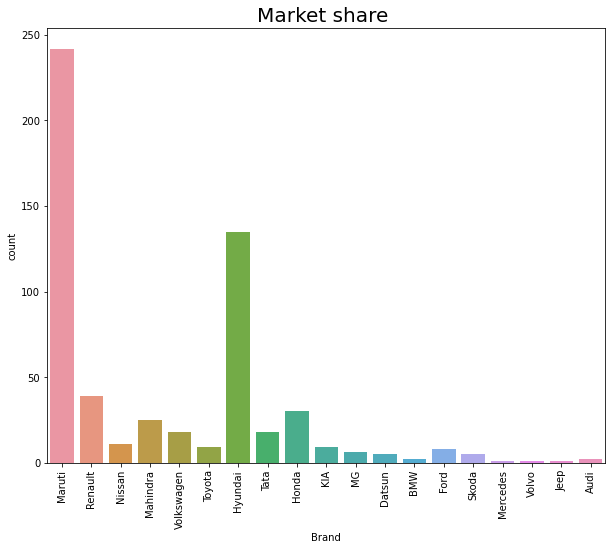

In [115]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Brand'])
plt.title('Market share ',fontsize=20)

plt.xticks(rotation=90)
plt.show()

Insight:- From the above graph we can say that Maruti has the highest share in the secondary market . out of the 567 availabe car's 242 belong's to Maruti Brand followed by Hundai  and Renault and so on.

In [1]:
#plt.figure(figsize=(10,8))
#labels = df['Brand'].unique()[:8]
#values = df['Brand'].value_counts()[:8]
#explode_val = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0)
#plt.axis("equal")
#plt.pie(values, labels=labels, autopct='%1.0f%%')
#plt.legend(labels,loc='upper right')

#plt.show()

In [6]:
print(df['Brand'].unique()[:8])
print(df['Brand'].value_counts()[:8])

['Maruti' 'Renault' 'Nissan' 'Mahindra' 'Volkswagen' 'Toyota' 'Hyundai'
 'Tata']
Maruti        242
Hyundai       135
Renault        39
Honda          30
Mahindra       25
Volkswagen     18
Tata           18
Nissan         11
Name: Brand, dtype: int64


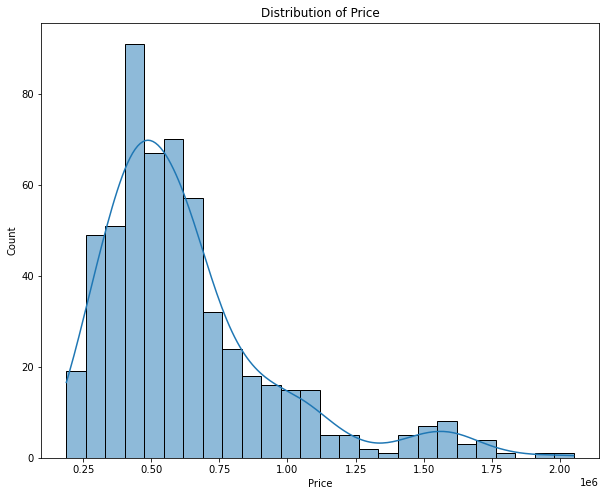

In [117]:
plt.figure(figsize=(10,8))
sns.histplot(df.Price,kde=True)
plt.title('Distribution of Price')
plt.show()

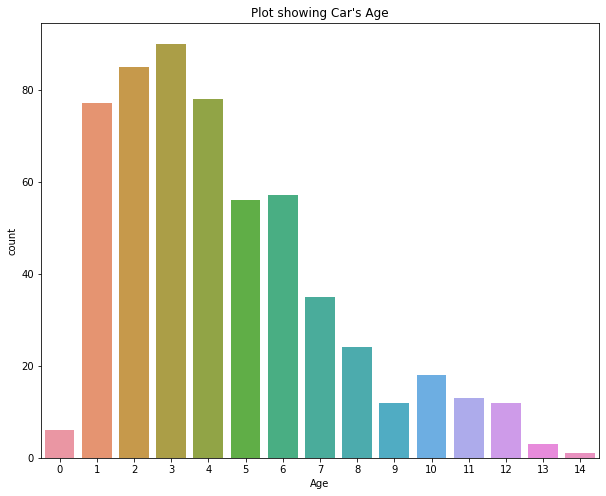

In [118]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Age'])
plt.title("Plot showing Car's Age")
plt.show()



In [ ]:
#most of the availabe car are 2-4 years old , few of them also aged more than 10 years but such car's are very less.

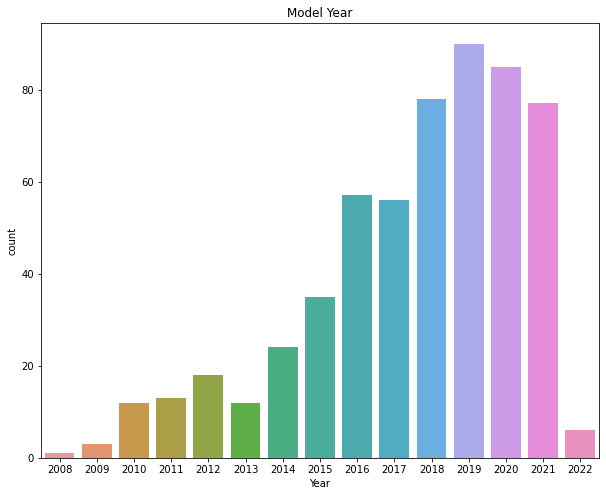

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Year'])
plt.title('Model Year')
plt.show()

Insight:-From this count Plot we can easily understood that most of the available car's for sale on cars24.com are manufactured in the year 2019 followed by 2020 and 2021

In [71]:
#sns.kdeplot(df['Price'])
#plt.title("Price distribution")
#plt.show()

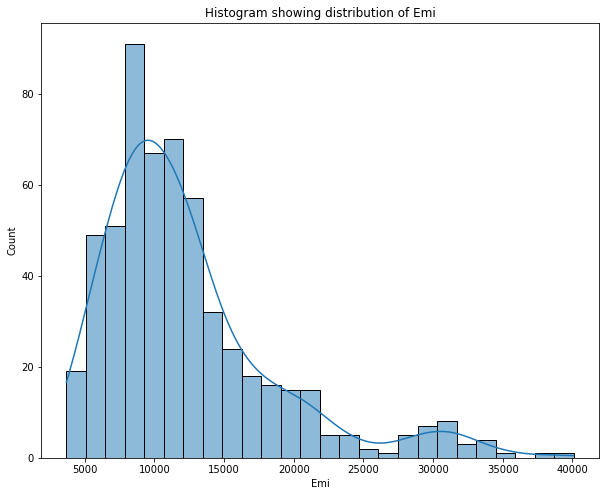

In [72]:
plt.figure(figsize=(10,8))
sns.histplot(df.Emi,kde=True)
plt.title('Histogram showing distribution of Emi')
plt.show()

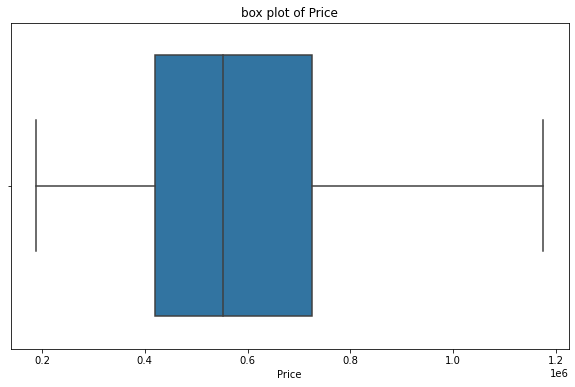

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Price',showfliers=False)
plt.title('Box plot of Price')
plt.show()

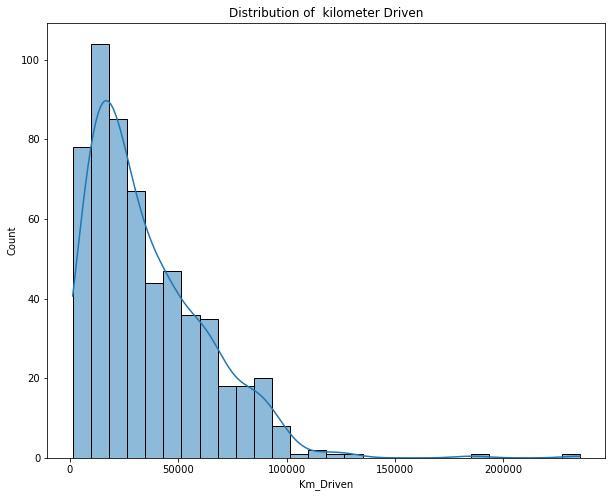

In [120]:
plt.figure(figsize=(10,8))
sns.histplot(df.Km_Driven,kde=True)
plt.title('Distribution of  kilometer Driven')
plt.xlabel=('Km_Driven')
plt.ylabel=('Count')
plt.show()

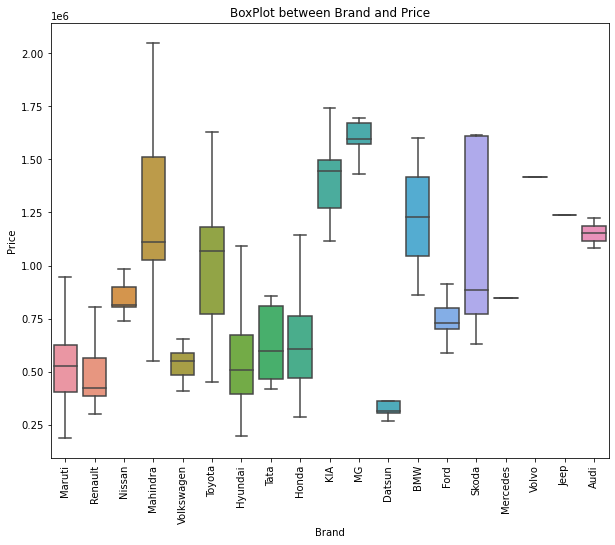

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Brand',y='Price',data=df,showfliers=False)
plt.title("BoxPlot between Brand and Price")
plt.xticks(rotation=90)
plt.show()

In [76]:
#sns.distplot(df.Price)
#plt.title('distribution of Price')
#plt.show()

In [77]:

#Checking mean prices of each Brand by applying groupby function.
df.groupby('Brand')['Price'].mean()

Brand
Audi          1.152799e+06
BMW           1.229749e+06
Datsun        3.430790e+05
Ford          7.467240e+05
Honda         6.380323e+05
Hyundai       5.609120e+05
Jeep          1.237499e+06
KIA           1.406221e+06
MG            1.639007e+06
Mahindra      1.227709e+06
Maruti        5.217868e+05
Mercedes      8.456990e+05
Nissan        8.025263e+05
Renault       5.101798e+05
Skoda         1.102719e+06
Tata          7.729268e+05
Toyota        1.043005e+06
Volkswagen    5.668223e+05
Volvo         1.416499e+06
Name: Price, dtype: float64

In [78]:
#Checking median prices of each Brand.
df.groupby(['Brand'])['Price'].median()

Brand
Audi          1152799.0
BMW           1229749.0
Datsun         314499.0
Ford           730449.0
Honda          606249.0
Hyundai        507699.0
Jeep          1237499.0
KIA           1443699.0
MG            1597599.0
Mahindra      1112099.0
Maruti         525574.0
Mercedes       845699.0
Nissan         816299.0
Renault        423899.0
Skoda          883999.0
Tata           599149.0
Toyota        1068149.0
Volkswagen     549549.0
Volvo         1416499.0
Name: Price, dtype: float64

In [79]:
#Price Variation of different Brands
PV=df[['Brand','Price']].groupby('Brand').mean()
PV

Price
Brand                   
Audi        1.152799e+06
BMW         1.229749e+06
Datsun      3.430790e+05
Ford        7.467240e+05
Honda       6.380323e+05
Hyundai     5.609120e+05
Jeep        1.237499e+06
KIA         1.406221e+06
MG          1.639007e+06
Mahindra    1.227709e+06
Maruti      5.217868e+05
Mercedes    8.456990e+05
Nissan      8.025263e+05
Renault     5.101798e+05
Skoda       1.102719e+06
Tata        7.729268e+05
Toyota      1.043005e+06
Volkswagen  5.668223e+05
Volvo       1.416499e+06

In [80]:
#Applying multiple function using agg
df.groupby(['Fuel_Type']).agg({'Km_Driven':['mean','median','count']})

Km_Driven               
                   mean   median count
Fuel_Type                             
Diesel     56208.447059  57307.0    85
Petrol     32162.307054  25303.5   482

In [70]:
df.groupby(['Brand']).agg({'Age':['mean','count']})

Age      
                 mean count
Brand                      
Audi         8.500000     2
BMW          8.500000     2
Datsun       2.800000     5
Ford         3.750000     8
Honda        6.000000    30
Hyundai      5.518519   135
Jeep         4.000000     1
KIA          1.888889     9
MG           1.666667     6
Mahindra     2.760000    25
Maruti       4.475207   242
Mercedes    11.000000     1
Nissan       1.545455    11
Renault      2.743590    39
Skoda        3.200000     5
Tata         2.333333    18
Toyota       5.222222     9
Volkswagen   4.666667    18
Volvo        6.000000     1

In [81]:
#groupby based on multiple categorical columns
#checking different brand's model car and their mean and median prices by applying groupby function.
df.groupby(['Brand','Model']).agg({'Price':['mean','median']})

Price           
                                    mean     median
Brand      Model                                   
Audi       A3               1.222799e+06  1222799.0
           Q3               1.082799e+06  1082799.0
BMW        3Series          1.229749e+06  1229749.0
Datsun     RediGo           3.430790e+05   314499.0
Ford       Ecosport         7.692704e+05   745999.0
...                                  ...        ...
Toyota     URBANCRUISER     1.183499e+06  1183499.0
Volkswagen Ameo             5.174990e+05   517499.0
           Polo             5.829933e+05   554849.0
           Vento            5.077990e+05   522999.0
Volvo      V40CrossCountry  1.416499e+06  1416499.0

[85 rows x 2 columns]

In [82]:
df.Model.unique()

array(['Swift', 'Dzire', 'Ritz', 'Kwid', 'MAGNITE', 'XUV3OO', 'Baleno',
       'Polo', 'NewWagon-R', 'TRIBER', 'InnovaCrysta', 'Verna', 'Tiago',
       'i10', 'Scorpio', 'Celerio', 'Grandi10', 'Elitei20', 'Kiger',
       'Amaze', 'NEWSANTRO', 'SONET', 'HECTOR', 'RediGo', 'GRANDI10NIOS',
       'Micra', 'Jazz', 'VitaraBrezza', 'SwiftDzire', '3Series',
       'Alto800', 'FigoAspire', 'WagonR1.0', 'CorollaAltis', 'City',
       'Rapid', 'AltoK10', 'Ciaz', 'BenzCClass', 'Creta', 'Eon', 'Duster',
       'i20', 'Vento', 'Ertiga', 'SantroXing', 'Safari', 'AStar', 'Eeco',
       'XUV500', 'Pulse', 'VENUE', 'EtiosLiva', 'V40CrossCountry', 'Alto',
       'SELTOS', 'KUSHAQ', 'AURA', 'Compass', 'SPRESSO', 'Brio', 'Accord',
       'Innova', 'Fortuner', 'Ecosport', 'TIAGONRG', 'URBANCRUISER', 'A3',
       'TIGOR', 'IGNIS', 'NEWI20', 'WR-V', 'Ameo', 'WagonR', 'ASTOR',
       'Thar', 'HECTORPLUS', 'Octavia', 'Glanza', 'i20Active', 'ALTROZ',
       'Q3', 'CelerioX', 'XUV700', 'XL6'], dtype=object)

In [83]:
df.groupby(['Brand','Model','Year']).agg({'Price':'mean','Km_Driven':'mean','Emi':'mean'})

Price  Km_Driven      Emi
Brand      Model           Year                               
Audi       A3              2014  1222799.0    91772.0  23906.0
           Q3              2013  1082799.0    89740.0  21169.0
BMW        3Series         2012   859499.0    77546.0  16803.0
                           2015  1599999.0    86411.0  31280.0
Datsun     RediGo          2018   304899.0     6996.0   5961.0
...                                    ...        ...      ...
Volkswagen Polo            2021   926099.0    37436.0  18105.0
           Vento           2011   408499.0    98974.0   7986.0
                           2014   522999.0    48999.0  10225.0
                           2016   591899.0    63696.0  11572.0
Volvo      V40CrossCountry 2016  1416499.0    21635.0  27693.0

[250 rows x 3 columns]

In [71]:
df.count()

Brand         567
Model         567
Year          567
Fuel_Type     567
Km_Driven     567
Owner_Type    567
Price         567
Emi           567
Age           567
dtype: int64

In [85]:
#summarize categories 
df['Brand'].value_counts()

Maruti        242
Hyundai       135
Renault        39
Honda          30
Mahindra       25
Volkswagen     18
Tata           18
Nissan         11
KIA             9
Toyota          9
Ford            8
MG              6
Datsun          5
Skoda           5
BMW             2
Audi            2
Mercedes        1
Volvo           1
Jeep            1
Name: Brand, dtype: int64

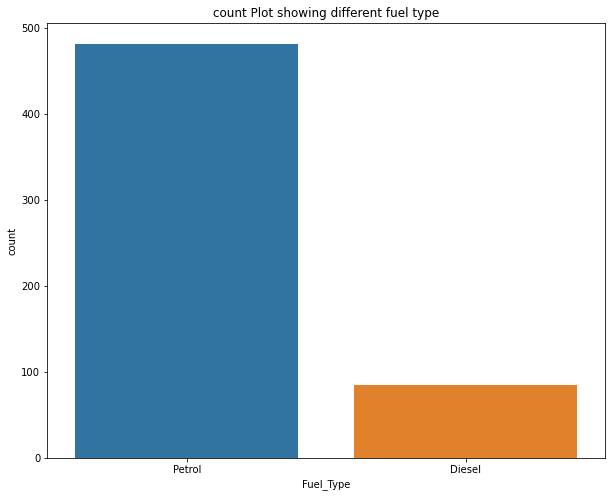

In [86]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.Fuel_Type)
plt.title('count Plot showing different fuel type')
plt.show()

In [ ]:
#Petrol Car's are more availabe than than Diesel Car

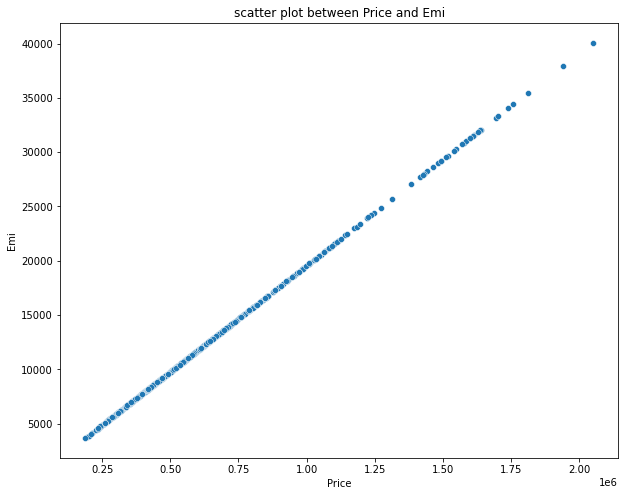

0.9999999988848571

In [87]:
#Bi Variate Analysis
plt.figure(figsize=(10,8))
x=df.Price
y=df.Emi
sns.scatterplot(x,y)
plt.title("scatter plot between Price and Emi")
plt.show()
df['Emi'].corr(df['Price'])

In [88]:
#perfect positive correlation

C:\Users\Khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


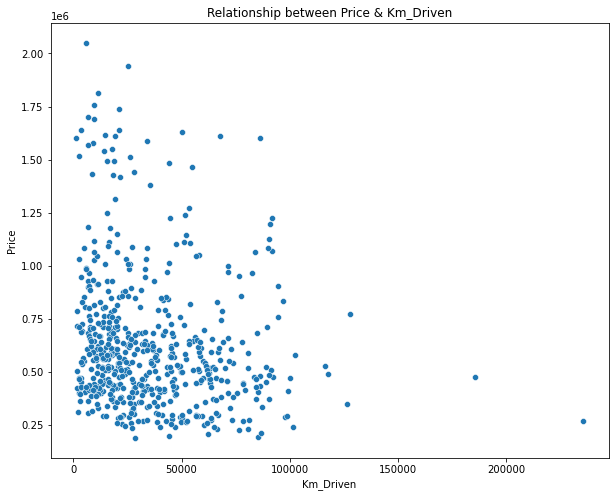

In [124]:
plt.figure(figsize=(10,8))
y=df.Price
x=df.Km_Driven
sns.scatterplot(x,y)
plt.title("Relationship between Price & Km_Driven")
plt.show()

In [122]:
df['Km_Driven'].corr(df['Price'])
#low negative relationship

-0.16732316472370784

C:\Users\Khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


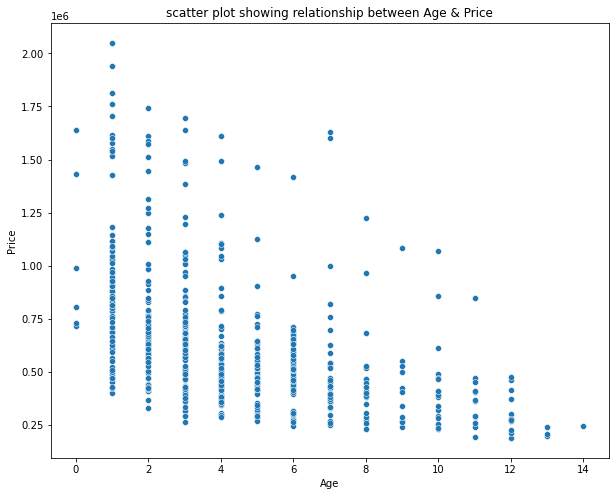

-0.4682318850974184

In [125]:
plt.figure(figsize=(10,8))
y=df.Price
x=df.Age
sns.scatterplot(x,y)
plt.title("scatter plot showing relationship between Age & Price")
plt.show()
df['Price'].corr(df['Age'])

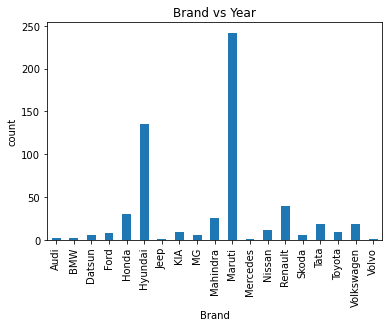

In [91]:
df.groupby(['Brand'])['Year'].count().plot(kind='bar')
plt.title('Brand vs Year')
plt.xlabel('Brand')
plt.ylabel('count')
plt.show()

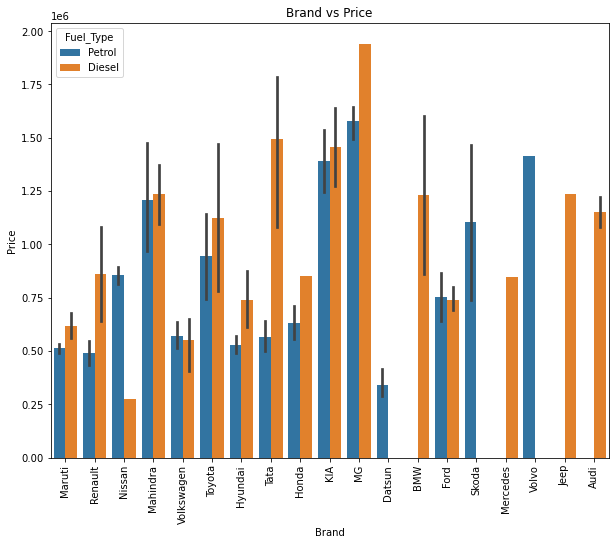

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(x='Brand',y='Price',hue='Fuel_Type',data=df)
plt.title('Brand vs Price')
plt.xticks(rotation=90)
plt.show()

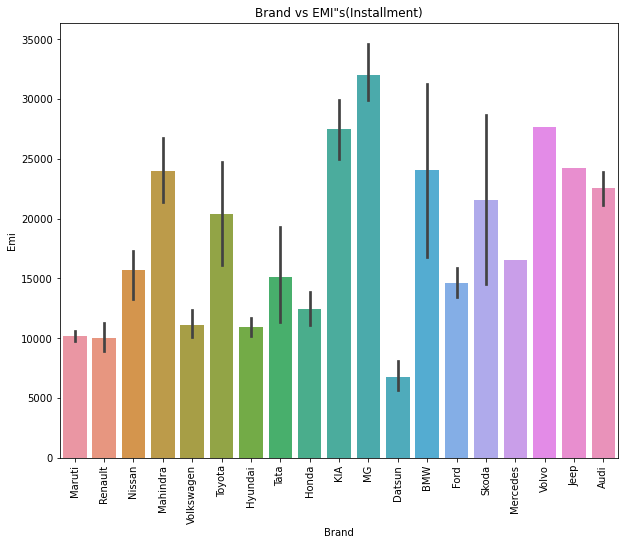

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='Brand',y='Emi',data=df)
plt.title('Brand vs EMI"s(Installment)')
plt.xticks(rotation=90)
plt.show()

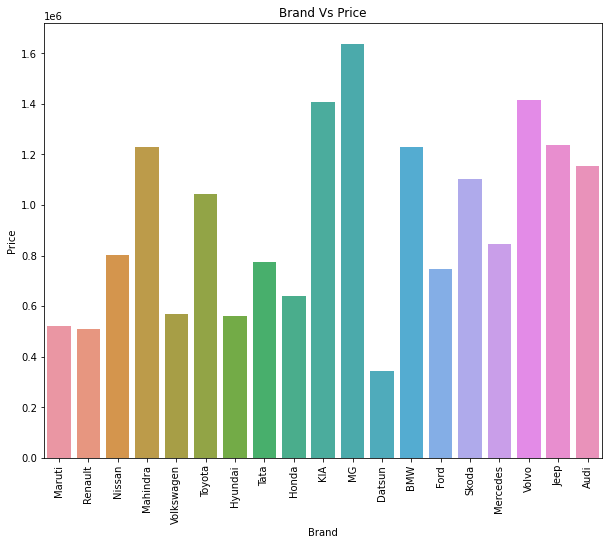

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Brand',y='Price',data=df,ci=None)
plt.title('Brand Vs Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#MG car's are the most expensive as compared to another brand

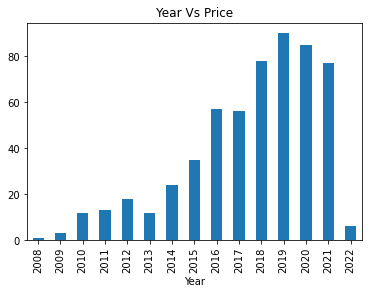

In [95]:
df.groupby(['Year'])['Price'].count().plot(kind='bar')
plt.title('Year Vs Price')
plt.show()

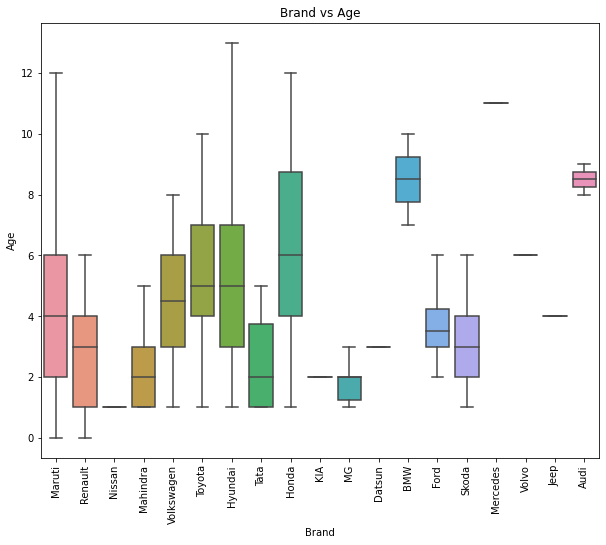

In [77]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.Brand,y=df.Age,showfliers=False)
plt.title('Brand vs Age')
plt.xticks(rotation=90)
plt.show()


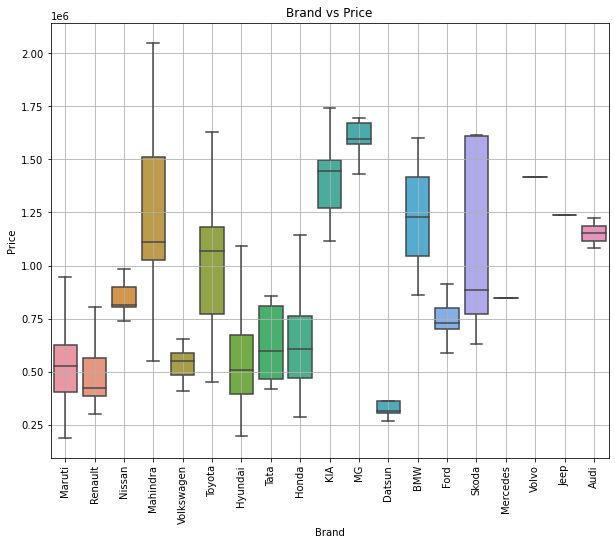

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.Brand,y=df.Price,showfliers=False)
plt.title('Brand vs Price')
plt.grid()
plt.xticks(rotation=90)
plt.show()

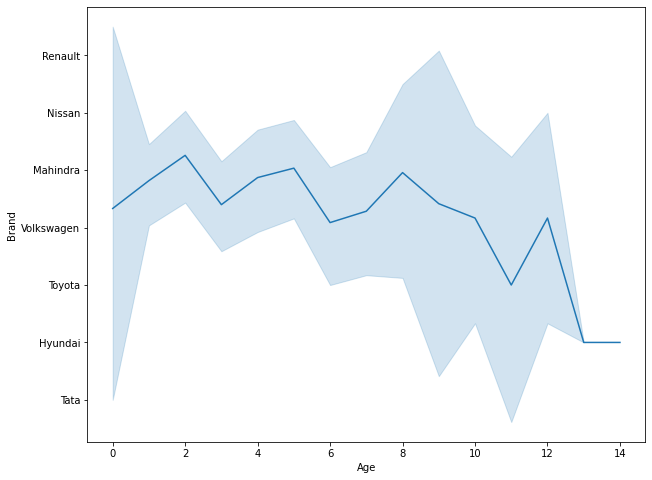

In [86]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df['Age'],y=df['Brand'])
plt.show()

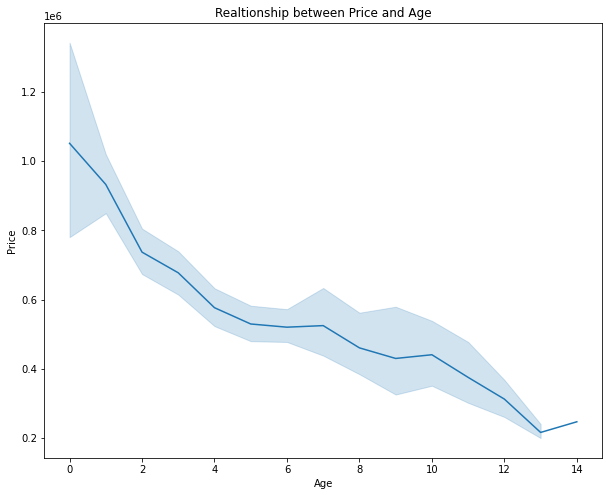

In [80]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df.Age,y=df.Price)
plt.title('Realtionship between Price and Age')
plt.show()

In [10]:
df.Price.corr(df['Age'])

-0.4682318850974184

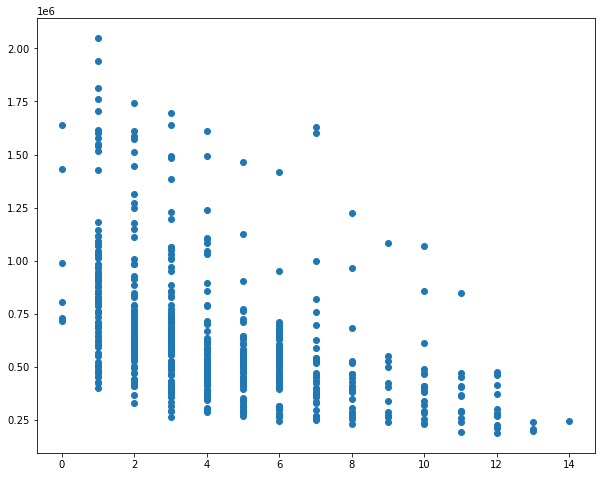

In [88]:

plt.figure(figsize=(10,8))

plt.scatter(y=df.Price,x=df.Age)
plt.xlabel='Age'
plt.ylabel='Price'
plt.show()

C:\Users\Khans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


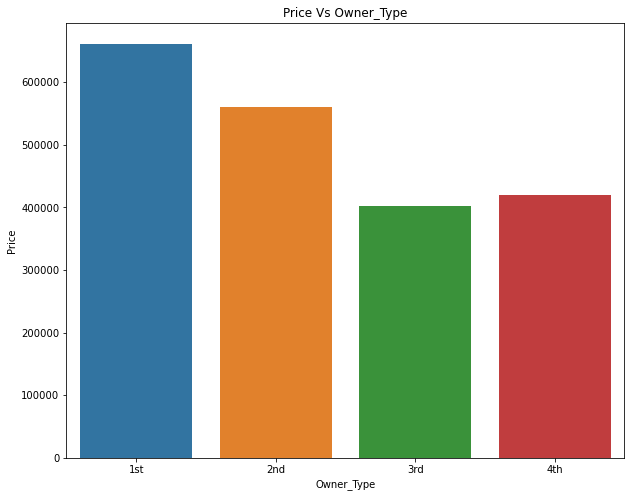

In [96]:
plt.figure(figsize=(10,8))
sns.barplot(df.Owner_Type,df.Price,ci=None)
plt.title('Price Vs Owner_Type')
plt.show()

In [ ]:
#Price Dicreases as ownershaip increases i,e- first hand car are costlier than second hand cars and so on

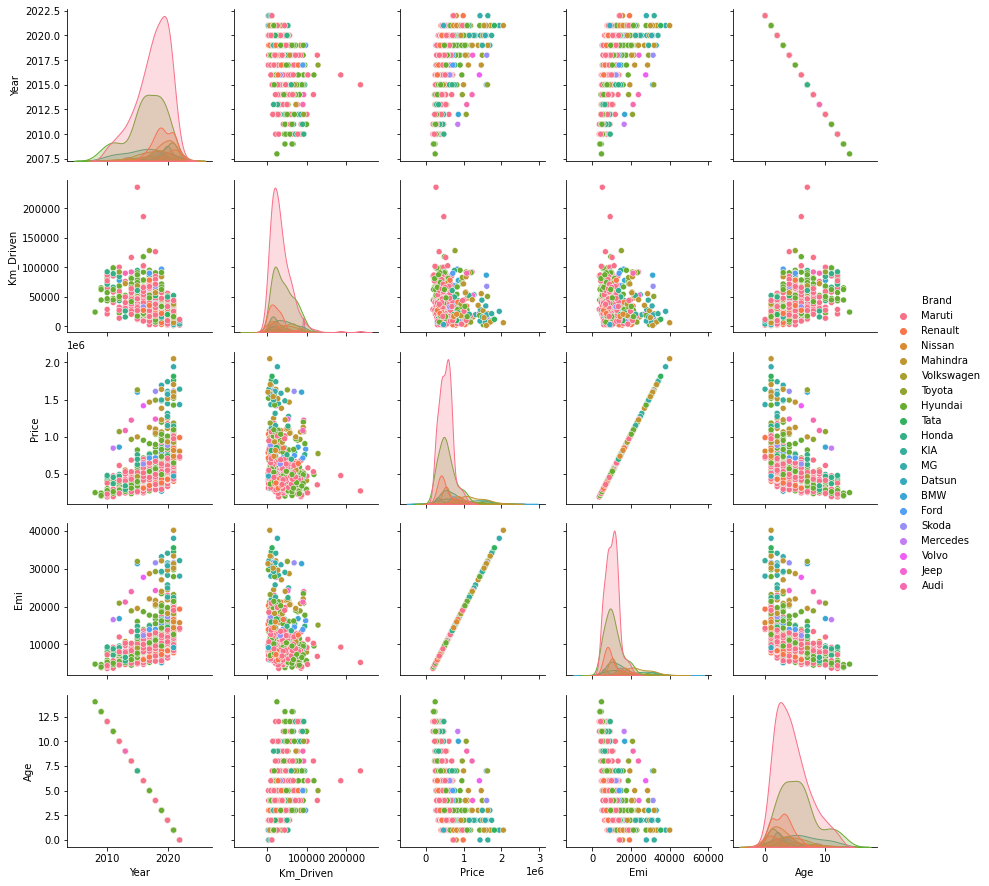

In [128]:
#Multivariate Plot
sns.pairplot(data=df,hue='Brand')
plt.show()

In [98]:
df.corr()

Year  Km_Driven     Price      Emi       Age
Year       1.000000  -0.514030  0.468232  0.46823 -1.000000
Km_Driven -0.514030   1.000000 -0.167323 -0.16732  0.514030
Price      0.468232  -0.167323  1.000000  1.00000 -0.468232
Emi        0.468230  -0.167320  1.000000  1.00000 -0.468230
Age       -1.000000   0.514030 -0.468232 -0.46823  1.000000

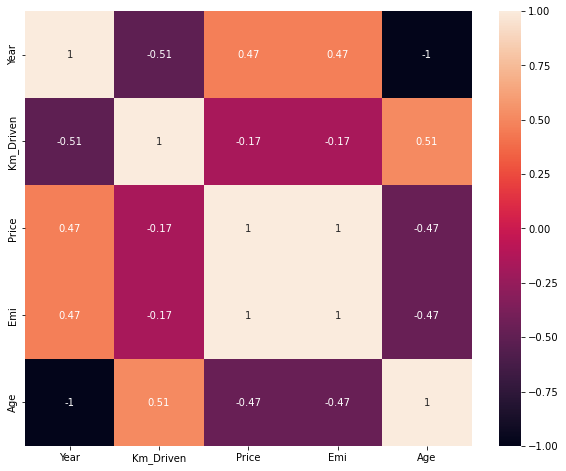

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [100]:
#car which is less driven
df.sort_values('Km_Driven',ascending=True)

Brand         Model  Year Fuel_Type  Km_Driven Owner_Type    Price  \
522  Mahindra          Thar  2021    Petrol       1254        1st  1599999   
13    Renault        TRIBER  2021    Petrol       1599        1st   786899   
211    Maruti       SPRESSO  2020    Petrol       1709        2nd   503599   
72     Maruti       Celerio  2022    Petrol       1793        1st   714099   
218    Maruti          Alto  2021    Petrol       1902        1st   423899   
..        ...           ...   ...       ...        ...        ...      ...   
148   Hyundai      Elitei20  2016    Petrol     117676        1st   491599   
341    Maruti       AltoK10  2018    Petrol     126194        1st   351299   
270    Toyota  CorollaAltis  2017    Petrol     128020        2nd   772499   
80     Maruti    SwiftDzire  2016    Petrol     185614        1st   475999   
138    Maruti       AltoK10  2015    Petrol     235466        1st   269299   

         Emi  Age  
522  31280.0    1  
13   15384.0    1  
211   9845.0    2  
72   13961.0    0  
218   8287.0    1  
..       ...  ...  
148   9611.0    6  
341   6868.0    4  
270  15103.0    5  
80    9306.0    6  
138   5265.0    7  

[567 rows x 9 columns]

In [101]:
#car with lowest Prices
df.sort_values('Price',ascending=True)

Brand       Model  Year Fuel_Type  Km_Driven Owner_Type    Price  \
86     Maruti     AltoK10  2010    Petrol      28382        1st   188399   
3      Maruti        Ritz  2011    Petrol      85095        1st   192299   
20    Hyundai         i10  2009    Petrol      44327        1st   199699   
362   Hyundai         i10  2009    Petrol      62164        2nd   207699   
129    Maruti       AStar  2010    Petrol      86695        2nd   212399   
..        ...         ...   ...       ...        ...        ...      ...   
348       KIA      SELTOS  2020    Petrol      21152        1st  1740599   
115      Tata      Safari  2021    Diesel       9585        2nd  1759099   
539      Tata      Safari  2021    Diesel      11570        1st  1813599   
411        MG  HECTORPLUS  2021    Diesel      25132        1st  1941949   
558  Mahindra      XUV700  2021    Petrol       5801        1st  2050099   

         Emi  Age  
86    3683.0   12  
3     3759.0   11  
20    3904.0   13  
362   4061.0   13  
129   4152.0   12  
..       ...  ...  
348  34029.0    2  
115  34391.0    1  
539  35456.0    1  
411  37965.0    1  
558  40080.0    1  

[567 rows x 9 columns]

In [102]:
df[(df.Owner_Type=='1st') & (df.Fuel_Type=='Diesel')].sort_values('Km_Driven',ascending=True)

Brand         Model  Year Fuel_Type  Km_Driven Owner_Type    Price  \
102       KIA         SONET  2022    Diesel       3704        1st  1640299   
497  Mahindra          Thar  2021    Diesel       6962        1st  1702699   
399  Mahindra          Thar  2021    Diesel       9034        1st  1577999   
539      Tata        Safari  2021    Diesel      11570        1st  1813599   
21   Mahindra       Scorpio  2020    Diesel      15537        1st  1248399   
..        ...           ...   ...       ...        ...        ...      ...   
416   Hyundai         Creta  2017    Diesel      94702        1st   906099   
346      Ford      Ecosport  2019    Diesel      96736        1st   831999   
126    Maruti    SwiftDzire  2012    Diesel      99947        1st   470299   
469    Maruti  VitaraBrezza  2016    Diesel     102367        1st   580399   
447    Maruti    SwiftDzire  2014    Diesel     116421        1st   527499   

         Emi  Age  
102  32068.0    0  
497  33288.0    1  
399  30850.0    1  
539  35456.0    1  
21   24406.0    2  
..       ...  ...  
416  17714.0    5  
346  16266.0    3  
126   9194.0   10  
469  11347.0    6  
447  10313.0    8  

[63 rows x 9 columns]

In [103]:
#different car's which fall under customer requirement. 
best_suited_Car=df[(df['Price']<=500000) & (df['Fuel_Type']=='Petrol') & (df['Km_Driven']<=10000)]
best_suited_Car

Brand      Model  Year Fuel_Type  Km_Driven Owner_Type   Price     Emi  \
4    Renault       Kwid  2019    Petrol       5660        1st  404099  7900.0   
54   Hyundai  NEWSANTRO  2020    Petrol       3812        2nd  473299  9253.0   
161  Renault       Kwid  2019    Petrol       2975        1st  423899  8287.0   
168  Renault       Kwid  2021    Petrol       3685        1st  451399  8825.0   
170   Maruti    Alto800  2017    Petrol       2314        1st  309099  6043.0   
175   Datsun     RediGo  2018    Petrol       6996        1st  304899  5961.0   
180  Renault       Kwid  2021    Petrol       2470        1st  399199  7804.0   
212   Maruti       Eeco  2020    Petrol       9068        1st  471999  9228.0   
218   Maruti       Alto  2021    Petrol       1902        1st  423899  8287.0   
261   Maruti    AltoK10  2018    Petrol       3101        1st  394599  7714.0   
263  Renault       Kwid  2021    Petrol       2863        1st  473299  9253.0   
308   Maruti       Alto  2020    Petrol       3031        1st  365249  7141.0   
313   Maruti       Alto  2021    Petrol       3729        1st  430399  8414.0   
317   Maruti    AltoK10  2019    Petrol       7427        1st  416999  8152.0   
331   Maruti  WagonR1.0  2017    Petrol       9711        3rd  443399  8669.0   
359   Maruti       Eeco  2020    Petrol       9398        2nd  409699  8010.0   
360   Maruti       Eeco  2020    Petrol       8234        1st  418899  8190.0   
361   Maruti       Eeco  2020    Petrol       7458        2nd  436499  8534.0   
392   Maruti    AltoK10  2018    Petrol       8108        1st  387399  7574.0   
446  Renault       Kwid  2019    Petrol       6029        1st  427599  8360.0   
487   Maruti  WagonR1.0  2016    Petrol       9300        1st  413999  8094.0   
516   Maruti    AltoK10  2016    Petrol       8628        1st  316299  6184.0   
518  Hyundai        Eon  2018    Petrol       6961        1st  361999  7077.0   
544   Datsun     RediGo  2021    Petrol       2631        1st  468799  9165.0   

     Age  
4      3  
54     2  
161    3  
168    1  
170    5  
175    4  
180    1  
212    2  
218    1  
261    4  
263    1  
308    2  
313    1  
317    3  
331    5  
359    2  
360    2  
361    2  
392    4  
446    3  
487    6  
516    6  
518    4  
544    1

In [ ]:
so there are 24 cars associated from different Brand out of which he has to pick any one